In [1]:
import pandas as pd
import seaborn as sns
import math

In [3]:
data = pd.read_csv("SATdata.csv")

In [4]:
data.drop(columns=['Unnamed: 0'], axis=1, inplace = True)

<AxesSubplot:xlabel='GPA', ylabel='SAT'>

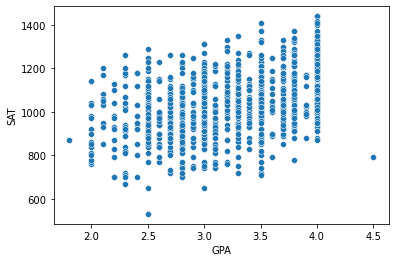

In [5]:
sns.scatterplot(data = data, x = "GPA", y = "SAT")

In [6]:
def testTrainSplit(df):
  total = len(df.index)
  splitLimit = int(total * 0.7)
  train = df[0:splitLimit]
  test = df[splitLimit: total]
  return train, test

In [7]:
train, test = testTrainSplit(data)
test.reindex()

,GPA,SAT
700,4.0,1120
701,3.0,1190
702,2.5,940
703,3.5,1160
704,2.3,920
...,...,...
995,3.7,1000
996,3.3,1080
997,3.5,1140
998,2.3,1200


In [12]:
def trainLR(data):
  '''
  1. Start y at 800 based on graph check and m of 1
  2. Calculate the distance between a data point and perpendicular point to line. Sum together. https://www.varsitytutors.com/precalculus-help/find-the-distance-between-a-point-and-a-line
  3. Add 0.1 to m
  4. Step 2
  5. Compare sum of first slope with second. Choose smallest sum. 
  6. If second, repeat steps 3 - 5.
  7. If first, subtract 0.1 from m.
  8. Repeat step 4 and 5.
  9. Repeat steps 5 - 8 until 1000 iterations.
  '''
  c1 = 800
  a1 = 1
  b1 = -1
  sum1 = getSumOfDistances(data, a1, b1, c1)
  c2 = 900
  a2 = 1
  b2 = -1
  sum2 = getSumOfDistances(data, a2, b2, c2)
  if sum1 < sum2:
    return a1, b1, c1
  else:
    return a2, b2, c2

In [11]:
def getSumOfDistances(data, a, b, c):
  sum = 0
  data.reindex()
  for row in range(len(data.index)):
    gpa = data.iat[row, 0]
    sat = data.iat[row, 1]
    distance = abs((a * gpa) + (b * sat) + c) / math.sqrt((a*a) + (b*b))
    sum = sum + distance
  return sum

In [10]:
a, b, c = trainLR(test)
print("Function: " + str(a) + "x + " + str(b) + "y = " + str(c))

Function: 1x + -1y = 900
